In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
x = tf.Variable([0,1,2,3,4,5,6,7.])

In [21]:
y = tf.Variable([1.85, 1.3, .61, .32, .089, -.66, -1.22, -1.37])

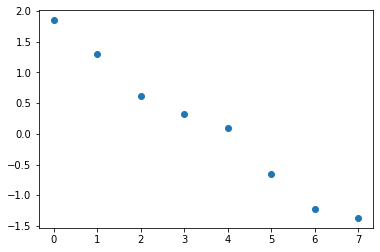

In [22]:
fig, ax = plt.subplots()
_ = ax.scatter(x,y)

In [23]:
k = tf.Variable([0.5])
b = tf.Variable([0.1])

In [24]:
def regression(my_x, my_k, my_b):
  return my_k*my_x + my_b

In [25]:
def regression_plot(my_x, my_y, my_k, my_b):
  fig, ax = plt.subplots()
  ax.scatter(my_x, my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_k, my_b)
  y_max = regression(x_max, my_k, my_b)

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max])

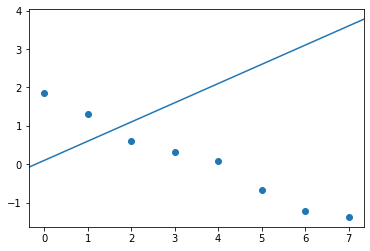

In [26]:
regression_plot(x,y,k,b)

In [27]:
def mse(my_yhat, my_y):
  sigma = tf.math.reduce_sum((my_yhat - my_y)**2)
  return sigma/(tf.size(my_y)).numpy()

In [28]:
with tf.GradientTape(persistent=True) as t:
  C = mse(regression(x,k,b), y)

In [29]:
trainable_variables = [k,b]
gradients = t.gradient(C, trainable_variables)
gradients

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([22.293499], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.4702497], dtype=float32)>]

In [30]:
opt = tf.optimizers.SGD(learning_rate=0.01)

In [31]:
opt.apply_gradients(zip(gradients, trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [32]:
k,b

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.277065], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.06529751], dtype=float32)>)

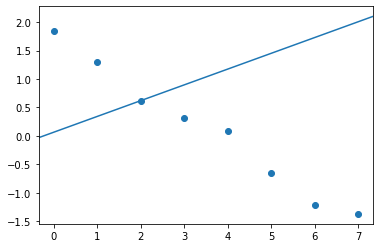

In [33]:
regression_plot(x,y,k,b)

In [34]:
epochs = 1000
for epoch in range(epochs):
  with tf.GradientTape() as t:
    C = mse(regression(x,k,b),y)
  gradients = t.gradient(C, [k,b])
  opt.apply_gradients(zip(gradients, [k,b]))
  print('Epoch {}, cost {}, k grad {}, b grad {}'.format(epoch, '%.3g' % C.numpy(), '%.3g' % gradients[0].numpy(), '%.3g' % gradients[1].numpy()))

Epoch 0, cost 3.77, k grad 14.2, b grad 1.84
Epoch 1, cost 2.08, k grad 9.13, b grad 0.806
Epoch 2, cost 1.39, k grad 5.88, b grad 0.151
Epoch 3, cost 1.1, k grad 3.81, b grad -0.264
Epoch 4, cost 0.983, k grad 2.5, b grad -0.525
Epoch 5, cost 0.928, k grad 1.66, b grad -0.69
Epoch 6, cost 0.899, k grad 1.13, b grad -0.792
Epoch 7, cost 0.882, k grad 0.788, b grad -0.855
Epoch 8, cost 0.869, k grad 0.572, b grad -0.893
Epoch 9, cost 0.858, k grad 0.434, b grad -0.915
Epoch 10, cost 0.848, k grad 0.346, b grad -0.927
Epoch 11, cost 0.838, k grad 0.29, b grad -0.933
Epoch 12, cost 0.829, k grad 0.254, b grad -0.935
Epoch 13, cost 0.82, k grad 0.23, b grad -0.934
Epoch 14, cost 0.81, k grad 0.215, b grad -0.931
Epoch 15, cost 0.801, k grad 0.205, b grad -0.927
Epoch 16, cost 0.792, k grad 0.198, b grad -0.923
Epoch 17, cost 0.783, k grad 0.193, b grad -0.919
Epoch 18, cost 0.775, k grad 0.19, b grad -0.914
Epoch 19, cost 0.766, k grad 0.188, b grad -0.909
Epoch 20, cost 0.757, k grad 0.18

In [35]:
k,b

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.46533713], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.7419908], dtype=float32)>)

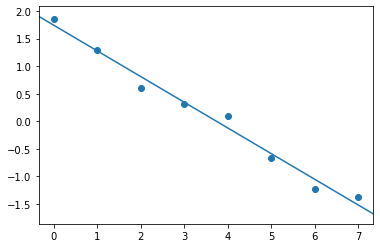

In [36]:
regression_plot(x,y,k,b)